In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from tensorflow.keras import layers

import numpy as np
np.set_printoptions(precision=5)
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
import scipy as sp
from scipy import stats
import sklearn

from scipy.stats import norm
import matplotlib.mlab as mlab

#from statsmodels.stats.diagnostic import lilliefors
#import statsmodels.api as sm 
from scipy.stats import chisquare

import pingouin as pg

from sklearn.preprocessing import PowerTransformer
import scipy.stats

import statsmodels.stats.weightstats as wstats

import time

/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.3.10.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/Users/ravithree/Library/Python/3.7/lib/python/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
#CSN_path = './'
CSN_path = './Data/'

def load_CSN_data():
    csv_path = CSN_path + "Master_List_LCPLCP.csv"
    return pd.read_csv(csv_path)

CSN = load_CSN_data()

CSN_new_err = CSN['Error'][-18:]

CSN = CSN.drop(['Example ID', 'Source', 'Figure ID', 'Data Provider', 'PI',
       'Date Received', 'Data Measurment Published', 'Prior Exposure', 'Comments', 'Error'], axis=1)

tsize = CSN.shape[0]//10

CSN_new = pd.get_dummies(CSN)

CSN_new['Surface Area per Liter'] = CSN_new['Surface Area (NMC) (m2/g)'] * CSN_new['Concentration (mg/L)']
CSN_new = CSN_new.drop(['Surface Area (NMC) (m2/g)'], axis=1)

CSN_new['log Concentration'] = np.log10(CSN_new['Concentration (mg/L)'] + 1e-9)
CSN_new = CSN_new.drop(['Concentration (mg/L)'], axis=1)

CSN_new_A = CSN_new[-18:] #assign the last 18 examples for 18 test cases for a different array

CSN_prepared_B = CSN_new[:-18] # Removing the last 18 
CSN_hold_1 = sklearn.utils.shuffle(CSN_prepared_B, random_state=5946) #shuffling the 206 data examples as Clyde did
tsize1 = CSN_hold_1.shape[0]//10 # decide the size of the test examples which is 20 - clyde did it

CSN_prepared_B = CSN_hold_1[:-tsize1] #Remove that 20 data examples from the bottom of the list

In [3]:
out5 = np.load('Data/true_test_186_100_real_20_clydetookout_L.pkl', allow_pickle=True)

0.507127655223012
0.37980422361195076
0.10069043210893869
0.38549826511740687
0.4254948783963919
0.26068719175457955
0.010702231183648048
0.21714361873269078
0.29071517691388726
0.3311840911321342
0.3869396256655455
0.6223753979946376
0.6635659853547813
0.5782507608377934
0.0783162765882015
0.29577887362163063
0.3062626266866255
0.2996237288520217


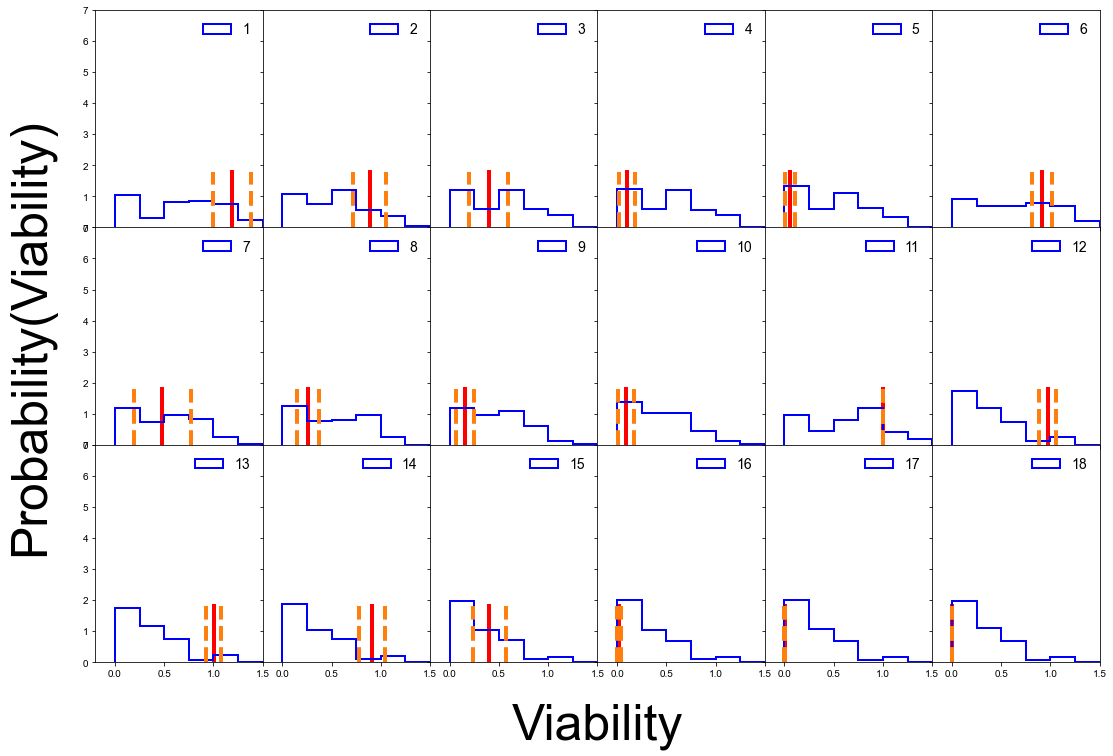

In [22]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 0, 0, i])
    ####variance= np.var(out5[:, 0, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out5[:, 0, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [6]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out5[:, 0, 0, i])
            b_list.append(M)

In [7]:
a_list

[1.19,
 0.8859999999999999,
 0.397,
 0.10099999999999999,
 0.052000000000000005,
 0.917,
 0.48200000000000004,
 0.258,
 0.159,
 0.087,
 1.0,
 0.972662,
 1.00455,
 0.9097649999999999,
 0.401871,
 0.0195827,
 0.00190607,
 0.0016286999999999999]

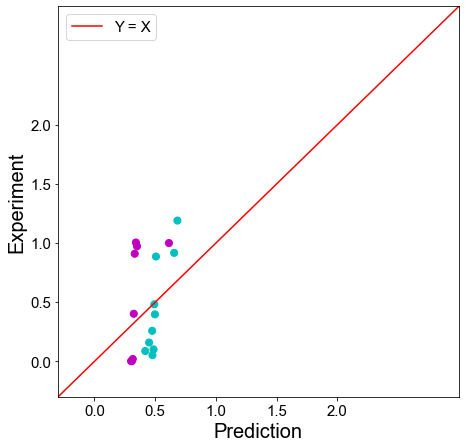

In [8]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.4162831335633671
0.30280254202979884
0.16408813610770723
0.4404574877051304
0.47148981221522396
0.1803315595580992
0.054992334263703924
0.2626014520390686
0.34692963645277
0.4073806516998518
0.37791051957891475
0.6105715447666595
0.6493019429809422
0.5609723429923308
0.05954888619292947
0.3167511194777986
0.32852796942359386
0.3233067498608762


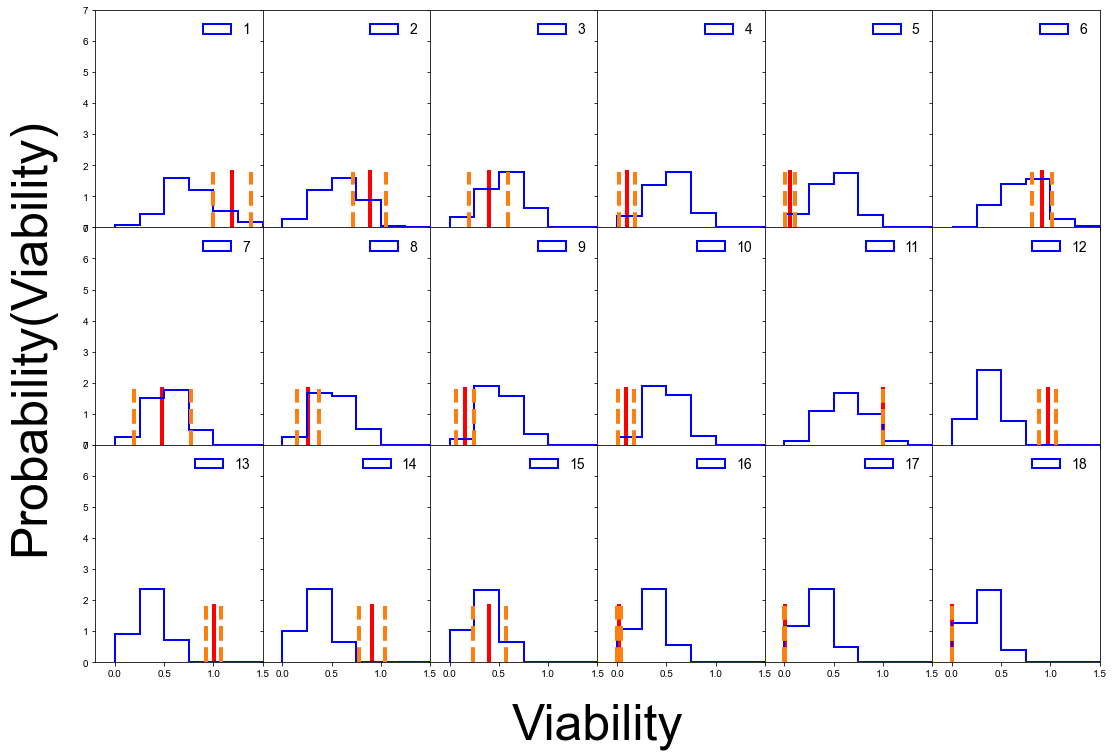

In [23]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 1, 0, i])
    ####variance= np.var(out5[:, 1, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out5[:, 1, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [11]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out5[:, 1, 0, i])
            b_list.append(M)

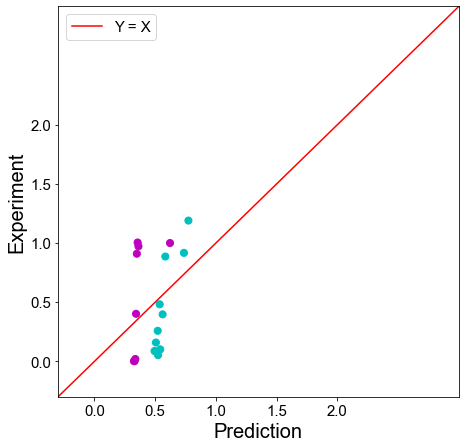

In [12]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.3677904679855676
0.26010400781082865
0.2090364751821575
0.4857882017094636
0.5149103042772653
0.13769863820533768
0.10820634377577204
0.3101115729728463
0.38867713881163046
0.4428810511336543
0.3321986951639986
0.5994652137902909
0.640804297109947
0.555321517488828
0.05566775264654039
0.31938037501684013
0.33036891747110225
0.32447672107650427


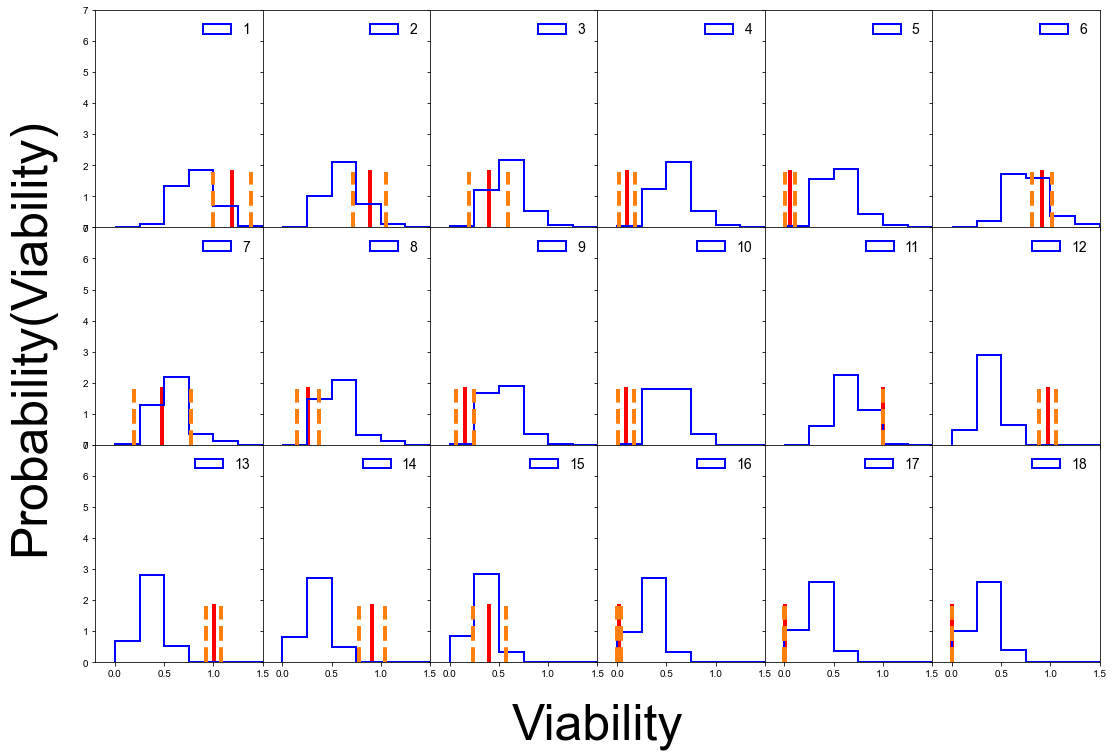

In [24]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 2, 0, i])
    ####variance= np.var(out5[:, 2, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out5[:, 2, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [14]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out5[:, 2, 0, i])
            b_list.append(M)

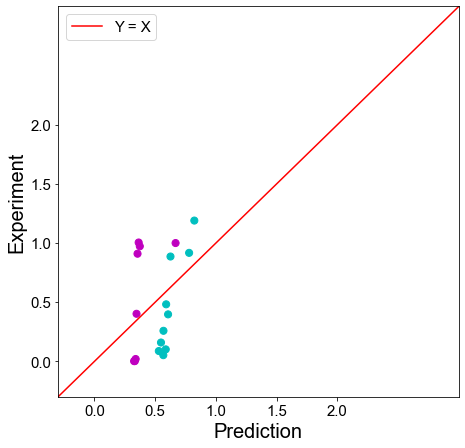

In [15]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()

0.36683203267641706
0.2696123442934423
0.19554448062686125
0.4675900471665906
0.4922960779915628
0.1254960646572575
0.10705710418521758
0.3070192212959617
0.38076998733175127
0.4287506270878263
0.314940148446081
0.5984351037530626
0.6404831920332097
0.5555348164968936
0.05610796385049216
0.31807144336091514
0.3285695696320626
0.32271088174000384


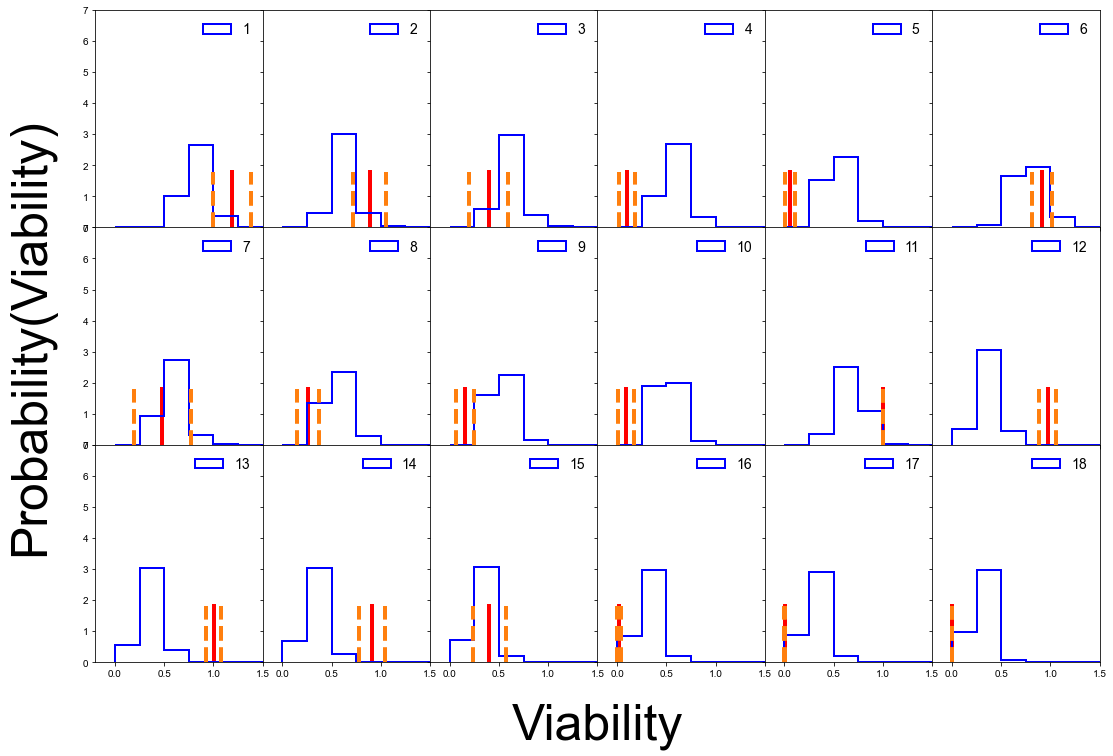

In [19]:
fig_new_dat, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True, gridspec_kw={'hspace': 0, 'wspace': 0})
axes = np.ravel(axes)

fig_new_dat.add_subplot(111, frameon=False)
#plt.title('Viability Strips on Test Set for 1000 1-fold bags ',fontsize=32)
plt.ylabel('Probability(Viability)', fontsize=50, labelpad=40)
plt.xlabel('Viability', fontsize=50, labelpad=40)
plt.yticks([])
plt.xticks([])

for i in np.arange(18):
    

    
    x_min = 0.0
    x_max = 1.5


    
    
    x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
    x2_err = [i for i in CSN_new_err][i]
    
    #print (x2)
    
    mean = [i for i in CSN_new_A['Viability Fraction ']][i]
    std = [i for i in CSN_new_err][i]
    
    
    M =np.mean(out5[:, 3, 0, i])
    ####variance= np.var(out5[:, 3, 0, i])
    ####sigma1 = np.sqrt(variance)
    
    Diff = abs(M-x2)
    ####percent = (Diff/x2)*100
    #print(percent)
    print (Diff)
    
    #U = stats.kstest((out5[:, 0, 0, i]), 'norm')
    #print (U)
    
    #V = scipy.stats.shapiro(out5[:, 0, 0, i])
    #print (V)
    
    ####W = stats.normaltest(out5[:, 0, 0, i])
    #print (W)
    
    ####A = scipy.stats.ttest_1samp(out5[:, 0, 0, i], x2)
    #print (A)
    
    axes[i].set_ylim([0, 7])
    axes[i].set_xlim([-0.2, 1.5])
    axes[i].hist(out5[:, 3, 0, i], bins=6, range=(0, 1.5), histtype='step', color='blue', density=True, label=i+1, lw=2)
    
    axes[i].plot(np.ones(10)*x2, np.arange(0, 2, 0.2), 'r-', lw=4, zorder=0)
    axes[i].plot(np.ones(10)*x2+x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4)    
    axes[i].plot(np.ones(10)*x2-x2_err, np.arange(0, 2, 0.2), 'C1--', lw=4) 
    
    
    ####x = np.linspace(x_min, x_max, 1000)

    ####y = scipy.stats.norm.pdf(x,mean,std)
    
    #axes[i].plot(x,y, color='green')
    #y1 = mlab.normpdf(x, M, sigma)
    #axes[i].plot(x, mlab.normpdf(x, M, sigma))
    ####y1 = scipy.stats.norm.pdf(x,M,sigma1)
    #axes[i].plot(x,y1, color='black')
    
    axes[i].legend(framealpha=0.0,fontsize=14)
    
    #print(scipy.integrate.quad(lambda x: (min(norm.pdf(x, mean, std), norm.pdf(x, M, sigma1))),0,1.5))
    #cohen_d1000(M, mean, sigma1, std)
    #ztest(mean,M,0,std,sigma1,1000)
    
#plt.show()
#plt.savefig('A_1000_1.pdf', transparent=True, format='pdf', bbox_inches='tight')

In [20]:
   a_list =[]
b_list =[]
for i in np.arange(18):
            x2 = [i for i in CSN_new_A['Viability Fraction ']][i]
 
            a_list.append(x2)
    
            M =np.mean(out5[:, 3, 0, i])
            b_list.append(M)

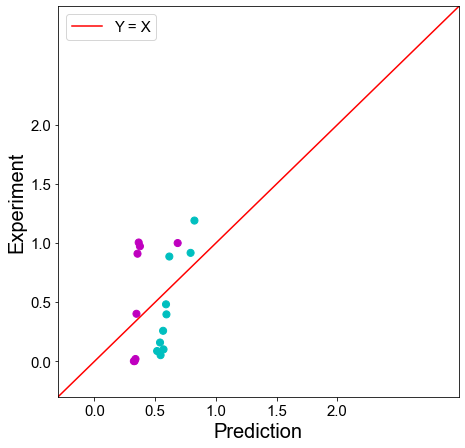

In [21]:
categories = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
colormap = np.array(['c', 'm'])


test_pred_fig = plt.figure(figsize=(7.18, 7.18))

plt.scatter(b_list, a_list, s=50, c=colormap[categories])
plt.plot((-1, 4), (-1, 4), 'r', label='Y = X')#, linewidth=3)
plt.legend(fontsize=15)
plt.xlabel('Prediction', fontsize=20)
plt.ylabel('Experiment', fontsize=20)
plt.xticks(np.linspace(0, 2, 5), fontsize=15)
plt.yticks(np.linspace(0, 2, 5), fontsize=15)
plt.ylim(-0.3, 3)
plt.xlim(-0.3, 3)

plt.show()